In [2]:
import os
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import numpy as np
import random

load_dotenv(override=True)

/workspaces/js-complexity-model/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [ ]:
from utils.preprocess_code import preprocess_js_code
from utils.get_complexity import get_complexity_label, get_complexity_score

In [4]:
hf_token = os.environ['HF_TOKEN']
login(hf_token, add_to_git_credential=True)

Token has not been saved to git credential helper.
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper as default.

git config --global credential.helper store

Read https://git-scm.com/book/en/v2/Git-Tools-Credential-Storage for more details.


In [5]:
dataset = load_dataset("semeru/code-text-javascript", split="train")

In [6]:
print(f"Number of Datas: {len(dataset):,}")

Number of Datas: 58,025


In [ ]:
TRAIN_SIZE = 5000
VAL_SIZE = 500
TEST_SIZE = 500

100%|██████████| 58025/58025 [00:09<00:00, 6335.68it/s]

The longest function is emitFiles and it has 372627 characters


In [ ]:
total_split = TRAIN_SIZE + VAL_SIZE + TEST_SIZE 

ds = dataset.select_columns(["original_string"])

main_split = ds.train_test_split(test_size=total_split, seed=42, shuffle=True)
pool_6k = main_split["test"]

eval_size = VAL_SIZE + TEST_SIZE
train_eval_split = pool_6k.train_test_split(test_size=eval_size, seed=42)

train_ds = train_eval_split["train"] 
temp_1k  = train_eval_split["test"]

final_split = temp_1k.train_test_split(test_size=TEST_SIZE, seed=42)
val_ds  = final_split["train"] 
test_ds = final_split["test"]

print(f"Final Sizes - Train: {len(train_ds)}, Test: {len(test_ds)}, Val: {len(val_ds)}")

In [ ]:
def process_item(example):
    processed_code = preprocess_js_code(example)
    return {
        "processed_string": processed_code,
        "length": len(processed_code)
    }

train_ds = train_ds.map(process_item)
val_ds   = val_ds.map(process_item)
test_ds  = test_ds.map(process_item)

print(train_ds[0]["processed_string"])
print(train_ds[0]["length"])

100%|██████████| 58025/58025 [00:10<00:00, 5402.30it/s]


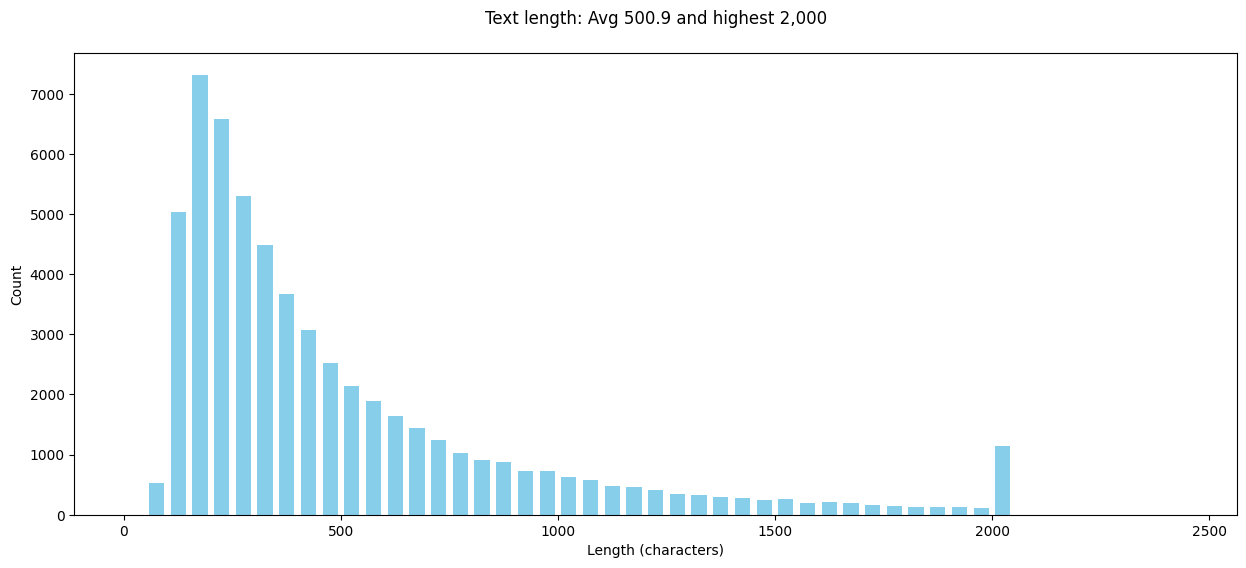

In [13]:
# Plot the distribution of lengths

plt.figure(figsize=(15, 6))
plt.title(f"Text length: Avg {sum(lengths)/len(lengths):,.1f} and highest {max(lengths):,}\n")
plt.xlabel('Length (characters)')
plt.ylabel('Count')
plt.hist(lengths, rwidth=0.7, color="skyblue", bins=range(0, 2500, 50))
plt.show()

function onChildRoutes(error, childRoutes) { if (error) { callback(error); } else if (childRoutes) { // Check the child routes to see if any of them match. matchRoutes(childRoutes, location, function (error, match) { if (error) { callback(error); } else if (match) { // A child route matched! Augment the match and pass it up the stack. match.routes.unshift(route); callback(null, match); } else { callback(); } }, remainingPathname, paramNames, paramValues); } else { callback(); } }

function warn(msg) { console.log(TAG + ' ' + colors.bold.black.bgYellow('WARNING') + ' ' + msg); }
